# Sensors Data Visualiation. 

Our Data contain four different Sensor data columns and one Compound columns which tell us the name of the Compound based on four different Sensor values. There are total 7 types of compound present in our dataset **(Acetone, Ethanol, Xylene, Benzene, 2-propanol, Methanol, Toluene)**.   

In [2]:
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [3]:
#Import data file
comp = pd.read_csv('C:\\ABC\\NewData.csv')
comp.head(10)

,ID,Sensor1,Sensor2,Sensor3,Sensor4,Compound
0,1,7724200,19702100,24094500,239833,Acetone
1,2,7732180,20105200,23921400,239807,Acetone
2,3,7715400,19960900,23898700,239504,Acetone
3,4,7765770,19935600,23244900,239611,Acetone
4,5,7713900,19939200,23230600,239121,Acetone
5,6,7668770,20131300,23661500,238942,Acetone
6,7,7680430,19891200,24438300,239002,Acetone
7,8,7685920,19946200,23650000,238661,Acetone
8,9,7659660,20084000,23766200,238489,Acetone
9,10,7639480,19950700,23848100,238535,Acetone


In [4]:
#Data Overview
comp['Compound'].value_counts()

Acetone       1020
Ethanol        781
Xylene         757
Benzene        737
2-propanol     723
Methanol       659
Toluene        651
Name: Compound, dtype: int64

## Feature Scaling.
Our data values are too large and difficult to visualize, so for better visualization to get some insight from the dataset we have to perform **feature scaling.**

>**Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

Techniques to perform Feature Scaling

* **Min-Max Normalization:** This technique re-scales a feature or observation value with distribution value between 0 and 1.
* **Standardization:** It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

In [7]:
from sklearn import preprocessing

#Standardization
std_scale = preprocessing.StandardScaler().fit(comp[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']])
comp_std = std_scale.transform(comp[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']])
print("\nAfter Standardisation : \n", comp_std) 

#Min-Max Normalization
minmax_scale = preprocessing.MinMaxScaler().fit(comp[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']])
comp_minmax = minmax_scale.transform(comp[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']])
print ("\nAfter min max Scaling : \n", comp_minmax) 


After Standardisation : 
 [[ 3.40736547  0.91327202  1.32273952 -0.86477103]
 [ 3.41642904  0.98713877  1.29910266 -0.86518393]
 [ 3.39737056  0.96069627  1.29600297 -0.86999579]
 ...
 [-0.76084946 -0.56168093 -1.24231721  0.48661526]
 [-0.79226643 -0.56796629 -1.24040605  0.47988183]
 [-0.78725648 -0.45112818 -1.24854759  0.40956198]]

After min max Scaling : 
 [[0.80083462 0.31890407 0.46515205 0.19371014]
 [0.80252418 0.32921483 0.46098827 0.19359436]
 [0.79897144 0.32552383 0.46044224 0.192245  ]
 ...
 [0.02382625 0.11302138 0.0133008  0.57266914]
 [0.01796973 0.11214403 0.01363747 0.57078093]
 [0.01890365 0.12845299 0.01220328 0.55106167]]


In [8]:
#Plot between Sensor1 and Sensor2
comp_std.plot(kind='scatter',x='Sensor1', y='Sensor2') 

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [9]:
# Plot between Sensor3 and Sensor4
comp_std.plot(kind='scatter',x='Sensor3', y='Sensor4') 

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

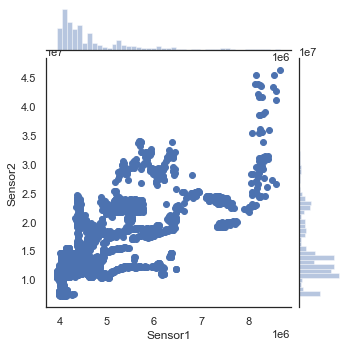

In [45]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='Sensor1',y='Sensor2', data=comp, size=5)

In [46]:
comp.shape

(5328, 6)

In [47]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5328 non-null   int64 
 1   Sensor1   5328 non-null   int64 
 2   Sensor2   5328 non-null   int64 
 3   Sensor3   5328 non-null   int64 
 4   Sensor4   5328 non-null   int64 
 5   Compound  5328 non-null   object
dtypes: int64(5), object(1)
memory usage: 249.9+ KB


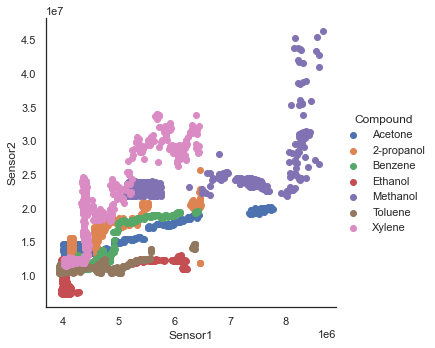

In [49]:
# use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(comp, hue = 'Compound', size=5) \
    .map(plt.scatter, 'Sensor1','Sensor2') \
    .add_legend()

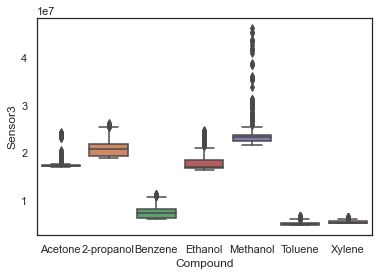

In [51]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x='Compound', y='Sensor3', data=comp)